# CGEM the Notebook
## Trying pywidgets...

## Compile the code

In [1]:
!make

gfortran -c    moc_src/singledouble.F90
gfortran -c    moc_src/sw_adtg.F90
gfortran -c    moc_src/sw_ptmp.F90
gfortran -c    moc_src/sw_temp.F90
gfortran -c    moc_src/p80.F90
gfortran -c    moc_src/constants.F90
gfortran -c    moc_src/phsolvers.F90
gfortran -c    moc_src/varsolver.F90
gfortran -c    moc_src/depth2press.F90
gfortran -c    moc_src/rho.F90
gfortran -c    moc_src/rhoinsitu.F90
gfortran -c    moc_src/vars.F90
gfortran -c    moc_src/p2fCO2.F90
gfortran -c    moc_src/gasx.F90
gfortran -c     cgem_src/date_time.F90
gfortran -c     cgem_src/grid.F90
gfortran -c     cgem_src/cgem.F90
gfortran -c     cgem_src/phyto_growth.F90
gfortran -c     cgem_src/Command_Line_Args.F90
gfortran -c     cgem_src/model_init.F90
gfortran -c     cgem_src/Check_InputFile.F90
gfortran -c     cgem_src/update_grid.F90
gfortran -c     cgem_src/getSolar.F90
gfortran -c     cgem_src/run_cgem.F90
gfortran -c     cgem_src/SDM.F90
gfortran -c     cgem_src/Nitrification.F90
gfortran -c     cgem_src/rnitrate.

## Import CGEM Python functions

In [2]:
from cgem import *

## Temperature is defined in the grid namelist file

Import both the grid and cgem namelists, and print out grid

In [3]:
import f90nml
cgem = f90nml.read('cgem.nml')
grid = f90nml.read('grid.nml')
print(grid)

&hydro
    nea = 1
    km = 5
    iyrs = 2006
    imons = 1
    idays = 1
    ihrs = 18
    imins = 0
    isecs = 0
    iyre = 2006
    imone = 6
    idaye = 1
    ihre = 18
    imine = 0
    isece = 0
    dt = 3600
    dt_out = 3600
    lon_in = -92.39
    lat_in = 29.03
    depth_in = 20.0
    sal_init = 30.0
    temp_init = 16.0
/


## The parameter to change is temp_init
The namelist file is called ***grid.nml***.  The *namelist* in that file with `temp_init` is called `hydro`.  (Quanities in hydro should come from SCHISM.)

In [15]:
Temperature = grid.get('hydro').get('temp_init')
Temperature

30

## Make a plot of phytoplankton 
With the initial temperature.

Plotting CGEM variable A


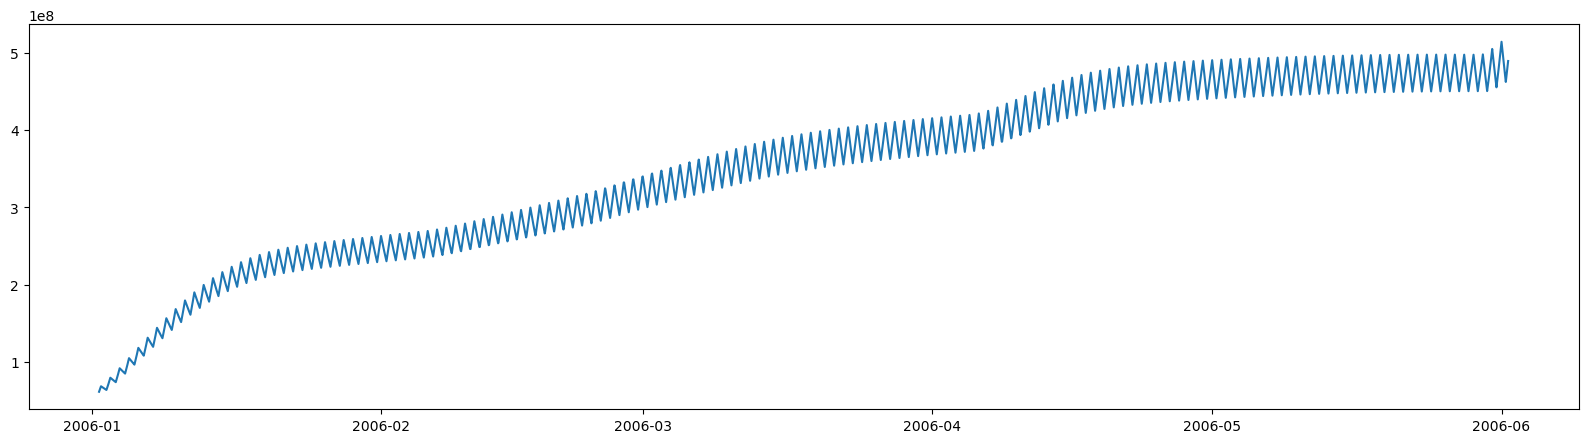

In [5]:
cgem_plot1D(grid,'A')

## Save the variable
We want to change the temperature and see what happens to A, so...

In [6]:
A_t16 = cgem_getvar("A")

Calculating CGEM variable A


## You can edit the file grid.nml directly, or use Python f90nml function to change it
See: http://f90nml.readthedocs.org/en/latest/

First, save a copy of grid.nml.

In [7]:
!cp grid.nml savegrid.nml

## Use f90nml to modify the namelist
```
grid['hydro']['temp_init'] = 30
grid.write('my_grid.nml')
```

The f90nml will not overwrite an existing file, so save the new file as ***mygrid.nml***.

In [8]:
grid['hydro']['temp_init'] = 30
grid.write('my_grid.nml')

The CGEM executable reads **grid.nml***, not my_grid.nml, so you have to *overwrite* grid.nml.  (I can make a Python function to make this easier later.  Baby steps.). We'll just use `mv` in the shell.

In [9]:
!mv my_grid.nml grid.nml

Check that the temperature was modified properly.

In [10]:
print(grid)
print("Temperature=",grid.get('hydro').get('temp_init'))

&hydro
    nea = 1
    km = 5
    iyrs = 2006
    imons = 1
    idays = 1
    ihrs = 18
    imins = 0
    isecs = 0
    iyre = 2006
    imone = 6
    idaye = 1
    ihre = 18
    imine = 0
    isece = 0
    dt = 3600
    dt_out = 3600
    lon_in = -92.39
    lat_in = 29.03
    depth_in = 20.0
    sal_init = 30.0
    temp_init = 30
/
Temperature= 30


## This is where I will attempt a 'Set Temperature' widget.

In [11]:
import ipywidgets as widgets

In [40]:
Temp=grid.get('hydro').get('temp_init')
Temp_min = 0.
Temp_max = 40.
Temp_text = "Temperature:"
Temp_step = 1

a = widgets.FloatText(
    value=Temp,
    min=Temp_min,
    max=Temp_max,
    step=Temp_step,
    description=Temp_text,
    disabled=False
)
b = widgets.FloatSlider(
    value=Temp,
    min=Temp_min,
    max=Temp_max,
    step=Temp_step,
    description=Temp_text,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=30.0, description='Temperature:', step=1.0)

FloatSlider(value=30.0, continuous_update=False, description='Temperature:', max=40.0, readout_format='.1f', s…

In [43]:
b.value

30.0

## Plot A at both temperatures
Get the new value, and define time while you are at it.

In [ ]:
A_t30 = cgem_getvar("A")
T = cgem_timearray(A_t30,grid)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,A_t16, color='darkblue', label='Phytoplankton at T=16C')
ax.plot(T,A_t30, color='darkred', label='Phytoplankton at T=30C')
ax.legend()
plt.ylabel('A: Phytoplankton number density (cells/m3)')
plt.show()

## Wow, I'm pretty relieved they are different, aren't you?
Try some more plots and let me know what happens.

### If you want to this test this again in the same Binder session, get the nml back the way it was. 

In [ ]:
!cp nml_save/grid.nml grid.nml